In [1]:
import os
os.chdir('C:\\Users\\Sumit Kumar\\Desktop\\py\\Machine Learning')
os.getcwd()

'C:\\Users\\Sumit Kumar\\Desktop\\py\\Machine Learning'

In [2]:
from joblib import dump,load
import numpy as np
mnist=load('MNIST.joblib')
x,y=mnist['data'],mnist['target']
y=y.astype(np.int32)
x,y=x.to_numpy(),y.to_numpy()

In [3]:
from sklearn.model_selection import train_test_split
# x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=42)
x_train,x_test,y_train,y_test=x[:60000],x[60000:],y[:60000],y[60000:]

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
pipeline=Pipeline([
    ('normalizer',Normalizer()),
    ('clf',KNeighborsClassifier())
])
# pipeline=StandardScaler()

In [5]:
# model=RandomForestClassifier()
pipeline.fit(x_train,y_train)

Pipeline(steps=[('normalizer', Normalizer()), ('clf', KNeighborsClassifier())])

In [6]:
from sklearn.model_selection import cross_val_predict
y_train_predict=cross_val_predict(pipeline,x_train,y_train,cv=3)

In [7]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train,y_train_predict)

array([[5897,    3,    3,    1,    1,    1,    9,    0,    5,    3],
       [   5, 6691,   19,    4,    2,    0,    3,    9,    3,    6],
       [  54,   23, 5774,   10,    8,    0,   10,   43,   28,    8],
       [  16,   11,   30, 5902,    1,   43,    4,   29,   62,   33],
       [  11,   36,    1,    1, 5612,    1,   21,   11,    1,  147],
       [  33,    9,    3,   71,   10, 5174,   64,    2,   22,   33],
       [  21,   11,    0,    0,    2,   18, 5862,    0,    4,    0],
       [   7,   42,   20,    2,   25,    0,    0, 6082,    3,   84],
       [  30,   69,   11,   56,   16,   42,   25,   15, 5544,   43],
       [  22,    7,    3,   37,   34,   14,    3,   55,   21, 5753]],
      dtype=int64)

In [8]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(pipeline,x_train,y_train,cv=3,scoring='accuracy')

In [9]:
scores.mean()

0.9715166666666666

In [10]:
y_test_predict=pipeline.predict(x_test)

In [11]:
pipeline.score(x_test,y_test)

0.973

In [12]:
os.chdir('C:\\Users\\Sumit Kumar\\Desktop\\py\\Machine Learning\\Project 2 digit recognition using MNIST')
os.getcwd()

'C:\\Users\\Sumit Kumar\\Desktop\\py\\Machine Learning\\Project 2 digit recognition using MNIST'

In [13]:
dump(pipeline,'clf.joblib')

['clf.joblib']

In [14]:
pipeline.predict(x_test[9502].reshape(1,-1))

array([4])

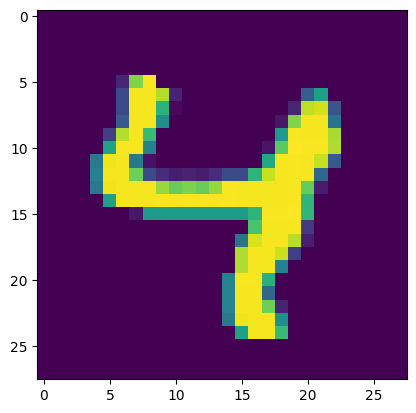

In [15]:
import matplotlib.pyplot as plt
plt.imshow(x_test[9502].reshape(28,28))

In [16]:
0.9745714285714285
0.9715166666666666
0.973

0.973